In [1]:
import os
import json
import sys

import numpy as np
import matplotlib.pyplot as plt
import importlib
from scripts.snap_reader import DiscReader, PlanetReader, PlanetSnap
import h5py
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [5]:
sys.path.append(os.path.abspath(os.path.join('..', 'DiscEvolution')))
DIR = 'planet_formation_scripts/output_planetesimals'

planets = PlanetReader(DIR, base='planet')

In [ ]:
planets=planets.compute_planet_evo()
tf = {}
for p in planets:
    if p.t_form[0] not in tf:
        tf[p.t_form[0]] = []
    tf[p.t_form[0]].append(p)

N = len(tf)
i = 0
keys = sorted(tf.keys())
plt.ion()
tf = {}
for p in planets:
    if p.t_form[0] not in tf:
        tf[p.t_form[0]] = []
    tf[p.t_form[0]].append(p)
plt.clf()

for p in tf[keys[i]]:
    plt.subplot(311)
    plt.loglog(p.time, p.M / 317.8)
    plt.subplot(312)
    plt.loglog(p.time, p.M_core)
    plt.subplot(313)
    plt.loglog(p.time, p.R)

plt.subplot(311)
plt.title('t_0 = {:g}yr'.format(p.t_form[0]))
plt.ylabel('$M\,[M_J]$')
plt.xlim(xmin=1e4)
plt.subplot(312)
plt.ylabel('$M_c\,[M_\oplus]$')
plt.xlim(xmin=1e4)
plt.subplot(313)
plt.xlabel('$t\,[\mathrm{yr}]$')
plt.ylabel('$R\,[\mathrm{au}]$')
plt.xlim(xmin=1e4)


plt.pause(1)
i = (i+1) % N
plt.show()

{}


<>:30: SyntaxWarning: invalid escape sequence '\,'
<>:33: SyntaxWarning: invalid escape sequence '\,'
<>:36: SyntaxWarning: invalid escape sequence '\,'
<>:37: SyntaxWarning: invalid escape sequence '\,'
<>:30: SyntaxWarning: invalid escape sequence '\,'
<>:33: SyntaxWarning: invalid escape sequence '\,'
<>:36: SyntaxWarning: invalid escape sequence '\,'
<>:37: SyntaxWarning: invalid escape sequence '\,'
C:\Users\Queena\AppData\Local\Temp\ipykernel_21692\4251422677.py:30: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$M\,[M_J]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_21692\4251422677.py:33: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$M_c\,[M_\oplus]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_21692\4251422677.py:36: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$t\,[\mathrm{yr}]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_21692\4251422677.py:37: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$R\,[\mathrm{au}]$')


IndexError: list index out of range

<Figure size 640x480 with 0 Axes>

<>:27: SyntaxWarning: invalid escape sequence '\S'
<>:38: SyntaxWarning: invalid escape sequence '\,'
<>:27: SyntaxWarning: invalid escape sequence '\S'
<>:38: SyntaxWarning: invalid escape sequence '\,'
C:\Users\Queena\AppData\Local\Temp\ipykernel_6688\2815334535.py:27: SyntaxWarning: invalid escape sequence '\S'
  plt.ylabel('$\Sigma_\mathrm{G, D}$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_6688\2815334535.py:38: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$a\,[\mathrm{cm}]$')


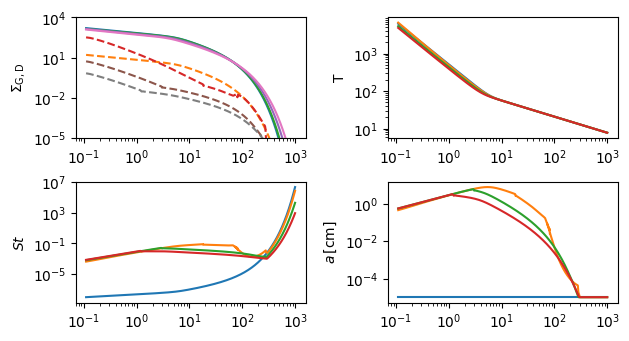

In [ ]:
reader = DiscReader(DIR, 'disc')
time = []
T = []
S = []
eps = []
size = []
C = [], []
O = [], []

snaps = [0, 10, 50, 100, 200, 300]
for n in snaps:
    try:
        disc = reader[n]
    except KeyError:
        continue

    Sigma_G = disc.Sigma*(1 - disc.dust_frac.sum(0))
    Sigma_D = disc.Sigma*(    disc.dust_frac       )
    Stokes = (disc.grain_size / disc.Sigma) * np.pi / 2

    plt.subplot(321)
    l, = plt.loglog(disc.R, Sigma_G)
    #plt.loglog(disc.R, Sigma_D.sum(0), l.get_color() + '--')
    l, = plt.loglog(disc.R, Sigma_D.sum(0), '--')
    c = l.get_color()
    plt.ylim(ymin=1e-5)
    plt.ylabel('$\Sigma_\mathrm{G, D}$')

    plt.subplot(322)
    l, = plt.loglog(disc.R, disc.T)
    #plt.ylim(ymin=1e-4)
    plt.ylabel('T')
    plt.subplot(323)
    l, = plt.loglog(disc.R, Stokes[1])
    plt.ylabel('$St$')
    plt.subplot(324)
    l, = plt.loglog(disc.R, disc.grain_size[1])
    plt.ylabel('$a\,[\mathrm{cm}]$')

plt.tight_layout()
plt.show()


In [ ]:
planets = PlanetReader(DIR, base='planet')
planets=planets.compute_planet_evo()
tf = {}
for p in planets:
    if p.t_form[0] not in tf:
        tf[p.t_form[0]] = []
    tf[p.t_form[0]].append(p)

N = len(tf)
i = 0
keys = sorted(tf.keys())
tf = {}
step = 250000
tolerance = 50  
for p in planets:
    if p.t_form[0] not in tf:
        tf[p.t_form[0]] = []
    tf[p.t_form[0]].append(p)
fig,ax=plt.subplots()


for p in tf[keys[i]]:
    plotted_line=plt.loglog(p.R, p.M,'--')
    plt.loglog(p.R, p.M_core,color=plotted_line[0].get_color())
    line_color = plotted_line[0].get_color()
    # Find indices where p.time is closest to multiples of step
    target_times = np.arange(0, np.max(p.time) + step, step)
    closest_indices = [np.abs(p.time - t).argmin() for t in target_times]
    # Apply tolerance filter
    filtered_indices = [i for i in closest_indices if abs(p.time[i] - round(p.time[i] / step) * step) <= tolerance]
    plt.scatter(p.R[filtered_indices], p.M[filtered_indices], color=line_color, marker='o', label="100k Steps")
    #plt.loglog(p.R, p.M,'--')

#plt.ylabel('$M_c\,[M_\oplus]$')
plt.ylabel('$M\,[M_\oplus]$')
plt.xlabel('$R\,[\mathrm{au}]$')


<>:35: SyntaxWarning: invalid escape sequence '\,'
<>:36: SyntaxWarning: invalid escape sequence '\,'
<>:35: SyntaxWarning: invalid escape sequence '\,'
<>:36: SyntaxWarning: invalid escape sequence '\,'
C:\Users\Queena\AppData\Local\Temp\ipykernel_6688\1469470425.py:35: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$M\,[M_\oplus]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_6688\1469470425.py:36: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$R\,[\mathrm{au}]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_6688\1469470425.py:35: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$M\,[M_\oplus]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_6688\1469470425.py:36: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$R\,[\mathrm{au}]$')


IndexError: tuple index out of range

In [ ]:
def plot_planets(Model):
    planets = PlanetReader(DIR, base='planet')
    planets=planets.compute_planet_evo()
    tf = {}
    for p in planets:
        if p.t_form[0] not in tf:
            tf[p.t_form[0]] = []
        tf[p.t_form[0]].append(p)

    N = len(tf)
    i = 0
    keys = sorted(tf.keys())
    tf = {}
    for p in planets:
        if p.t_form[0] not in tf:
            tf[p.t_form[0]] = []
        tf[p.t_form[0]].append(p)
    fig,ax=plt.subplots()
    step = 250000
    tolerance = 50  
    for p in tf[keys[i]]:
        plotted_line=plt.loglog(p.R, p.M,'--')
        plt.loglog(p.R, p.M_core,color=plotted_line[0].get_color())
        line_color = plotted_line[0].get_color()
        # Find indices where p.time is closest to multiples of step
        target_times = np.arange(0, np.max(p.time) + step, step)
        closest_indices = [np.abs(p.time - t).argmin() for t in target_times]
        # Apply tolerance filter
        filtered_indices = [i for i in closest_indices if abs(p.time[i] - round(p.time[i] / step) * step) <= tolerance]
        plt.scatter(p.R[filtered_indices], p.M[filtered_indices], color=line_color, marker='o', label="100k Steps")
        #plt.loglog(p.R, p.M,'--')

    #plt.ylabel('$M_c\,[M_\oplus]$')
    plt.ylabel('$M\,[M_\oplus]$')
    plt.xlabel('$R\,[\mathrm{au}]$')
    plt.savefig(DIR+Model+".pdf", format="pdf", bbox_inches="tight")
    plt.close(fig)

<>:34: SyntaxWarning: invalid escape sequence '\,'
<>:35: SyntaxWarning: invalid escape sequence '\,'
<>:34: SyntaxWarning: invalid escape sequence '\,'
<>:35: SyntaxWarning: invalid escape sequence '\,'
C:\Users\Queena\AppData\Local\Temp\ipykernel_18912\3957244167.py:34: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$M\,[M_\oplus]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_18912\3957244167.py:35: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$R\,[\mathrm{au}]$')


C:\Users\Queena\AppData\Local\Temp\ipykernel_18912\3957244167.py:34: SyntaxWarning: invalid escape sequence '\,'
  plt.ylabel('$M\,[M_\oplus]$')
C:\Users\Queena\AppData\Local\Temp\ipykernel_18912\3957244167.py:35: SyntaxWarning: invalid escape sequence '\,'
  plt.xlabel('$R\,[\mathrm{au}]$')


IndexError: list index out of range

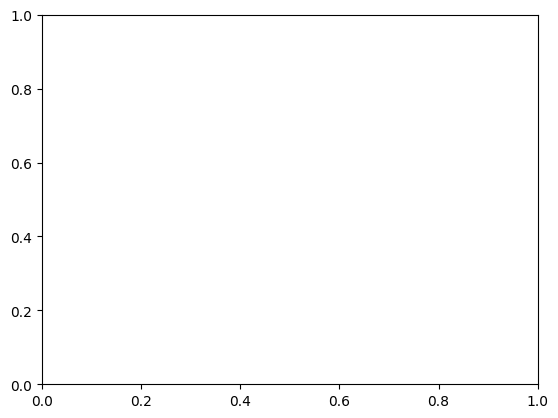

In [ ]:
import string
Models=np.append(['Base'],np.array(list(string.ascii_uppercase[:26])))
for m in Models:
    plot_planets(m)
#plot_planets('Y')
